# Accuracy Paradox

This notebook, to illustrate the failure of accuracy metrix in imbalancing dataset for a classification problem.

In [ ]:
# ! pip install -U scikit-learn

In [7]:
import numpy as np
from matplotlib import pyplot
from sklearn.datasets import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Class 0: 90.909%, Class 1: 9.091%


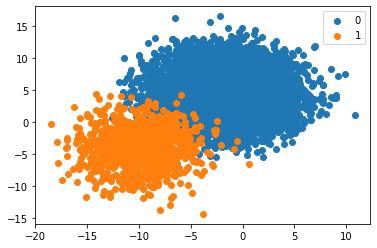

In [8]:
# define an imbalanced dataset with a 1:100 class ratio

# create a dataset with a given class distribution
def get_dataset(proportions):
	# determine the number of classes
	n_classes = len(proportions)
	# determine the number of examples to generate for each class
	largest = max([v for k,v in proportions.items()])
	n_samples = largest * n_classes
	# create dataset
	X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1, cluster_std=3)
	# collect the examples
	X_list, y_list = list(), list()
	for k,v in proportions.items():
		row_ix = np.where(y == k)[0]
		selected = row_ix[:v]
		X_list.append(X[selected, :])
		y_list.append(y[selected])
	return np.vstack(X_list), np.hstack(y_list)

# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = len(np.unique(y))
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = np.where(y == class_value)[0]
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	# show the plot
	pyplot.show()

# define the class distribution 1:100
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)
# summarize class distribution:
major = (len(np.where(y == 0)[0]) / len(X)) * 100
minor = (len(np.where(y == 1)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%' % (major, minor))
# plot dataset
plot_dataset(X, y)

In [9]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
 # define model
 model = DummyClassifier(strategy='most_frequent')
 # evaluate a model with repeated stratified k fold cv
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
 return scores
 
# define the class distribution 1:100
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)
# summarize class distribution:
major = (len(np.where(y == 0)[0]) / len(X)) * 100
minor = (len(np.where(y == 1)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%' % (major, minor))
# evaluate model
scores = evaluate_model(X, y, 'accuracy')
# report score
print('Accuracy: %.3f%%' % (np.mean(scores) * 100))

Class 0: 90.909%, Class 1: 9.091%
Accuracy: 90.909%
